In [2]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline




import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 





from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from numpy import loadtxt
import pandas as pd

In [3]:
df = pd.read_csv('telco_join.csv')
df.head(4)

State  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0    KS             25     265.1     197.4       244.7       10.0   
1    OH             26     161.6     195.5       254.4       13.7   
2    NJ              0     243.4     121.2       162.6       12.2   
3    OH              0     299.4      61.9       196.9        6.6   

   CustServ Calls  Day Calls  Day Charge  Eve Calls  ...  Night Calls  \
0               1        110       45.07         99  ...           91   
1               1        123       27.47        103  ...          103   
2               0        114       41.38        110  ...          104   
3               2         71       50.90         88  ...           89   

   Night Charge  Intl Calls  Intl Charge  Area Code     Phone Account Length  \
0         11.01           3         2.70        415  382-4657            128   
1         11.45           3         3.70        415  371-7191            107   
2          7.32           5         3.29        415  358-1921            137   
3          8.86           7         1.78        408  375-9999             84   

   Churn  Int'l Plan  VMail Plan  
0      0           0           1  
1      0           0           1  
2      0           0           0  
3      0           1           0  

[4 rows x 21 columns]

In [4]:
#now, lets group our student testscores into four bins.

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,  110, 120, 130, 140, 150, 160, 170, 180, 190, 200,  210, 220, 230, 240, 250,]

group_grade_names = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,  110, 120, 130, 140, 150, 160, 170, 180, 190, 200,  210, 220, 230, 240, ]

df['Account_Length_grade']= pd.cut(df['Account Length'], bins,labels =group_grade_names)

In [5]:
df.head(2)

State  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0    KS             25     265.1     197.4       244.7       10.0   
1    OH             26     161.6     195.5       254.4       13.7   

   CustServ Calls  Day Calls  Day Charge  Eve Calls  ...  Night Charge  \
0               1        110       45.07         99  ...         11.01   
1               1        123       27.47        103  ...         11.45   

   Intl Calls  Intl Charge  Area Code     Phone  Account Length Churn  \
0           3          2.7        415  382-4657             128     0   
1           3          3.7        415  371-7191             107     0   

   Int'l Plan  VMail Plan  Account_Length_grade  
0           0           1                   120  
1           0           1                   100  

[2 rows x 22 columns]

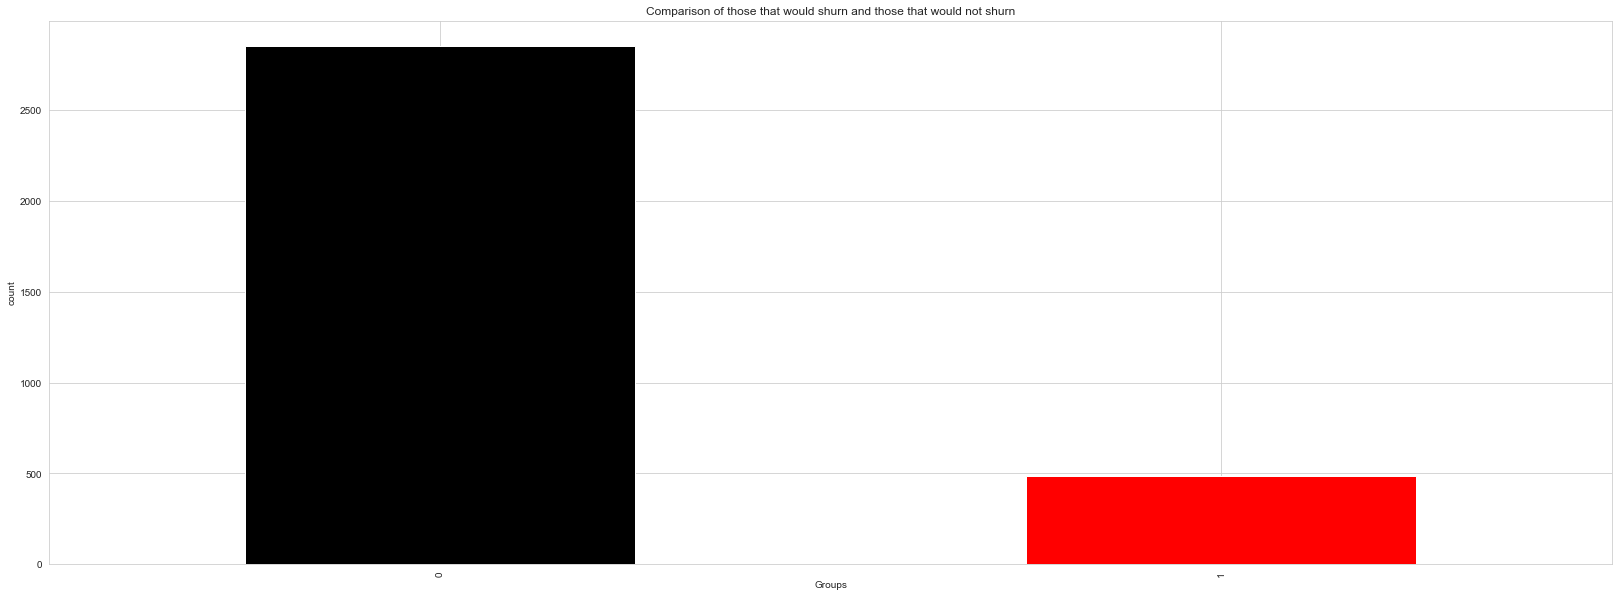

In [6]:
plt.subplots(figsize=(28,10))
df['Churn'].value_counts(normalize = True)
df['Churn'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison of those that would shurn and those that would not shurn')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

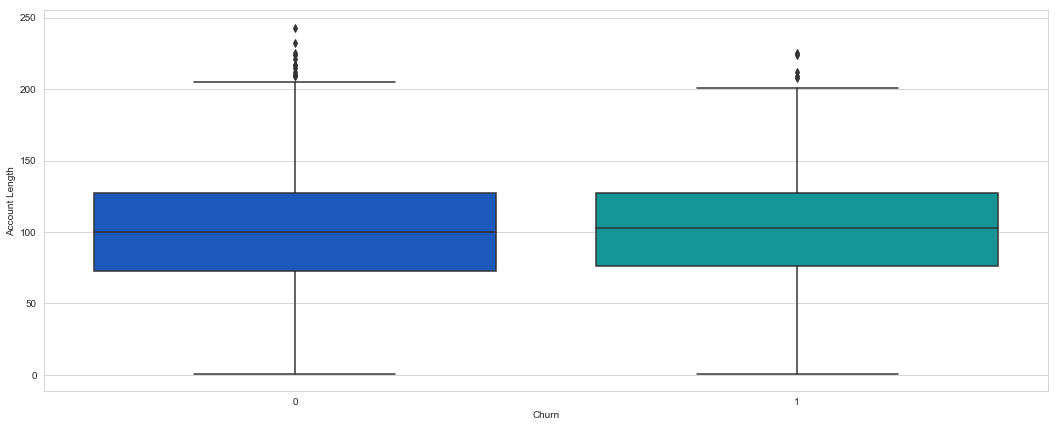

In [7]:
#does the account lenght of an indivual determine if the person would shurn ?

plt.figure(figsize=(18, 7))
sns.boxplot(x='Churn',y='Account Length',data=df,palette='winter')

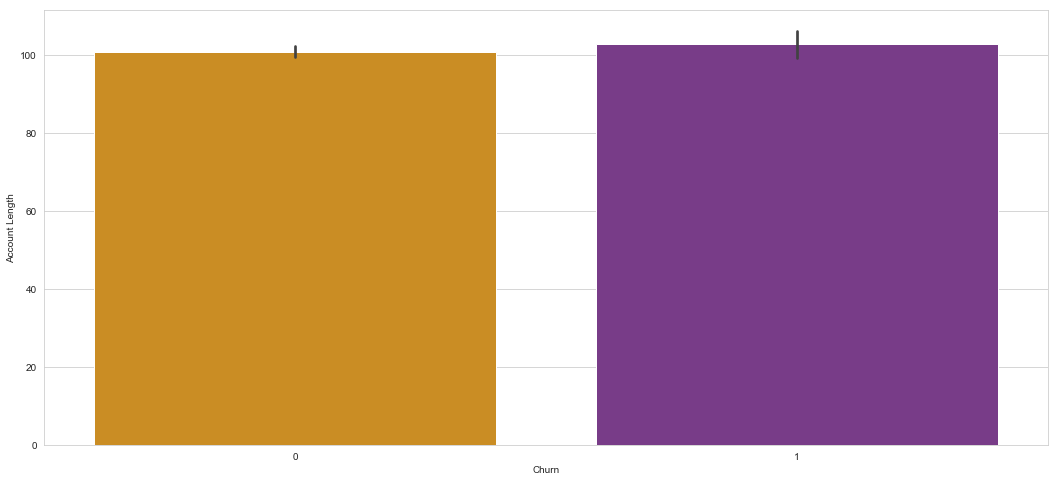

In [8]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Churn',y='Account Length',data=df,  palette='CMRmap_r')

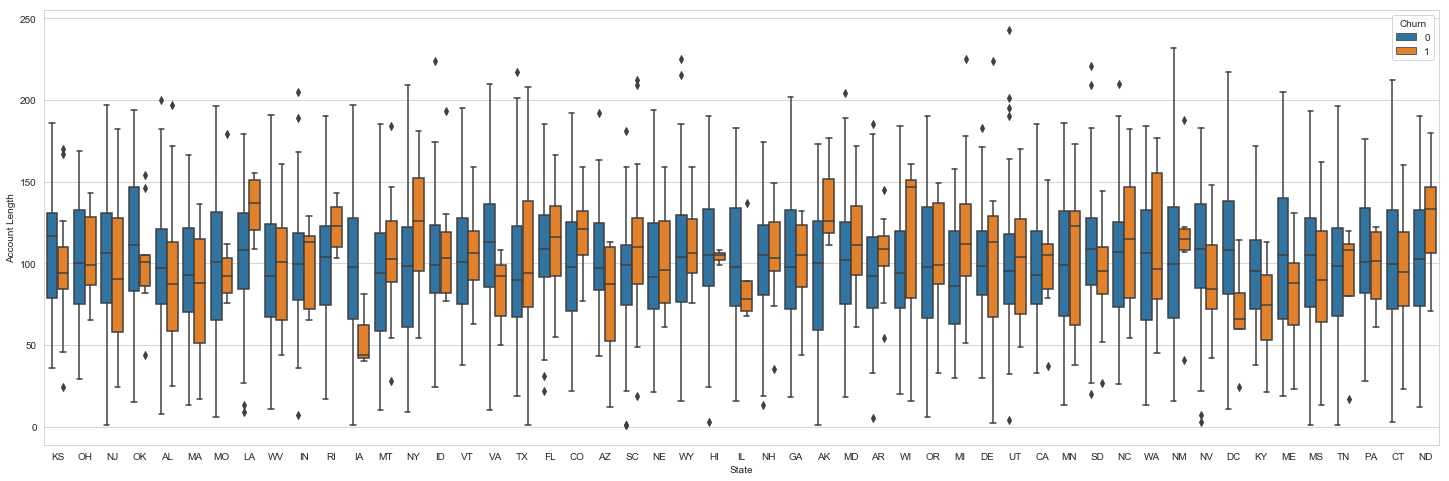

In [9]:
plt.figure(figsize=(25, 8))

sns.boxplot(x = 'State', y = 'Account Length',  data=df, hue='Churn')

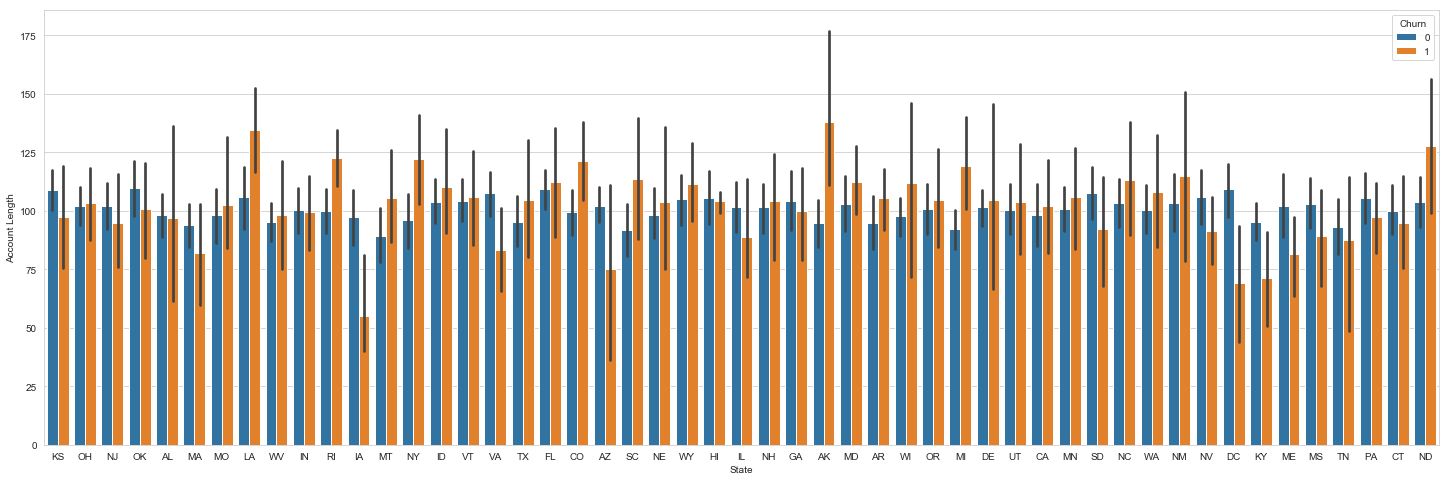

In [10]:
#does the state and the account length of a person determine if the person would shurn or not?
plt.figure(figsize=(25, 8))

sns.barplot(x = 'State', y = 'Account Length',  data=df, hue='Churn')

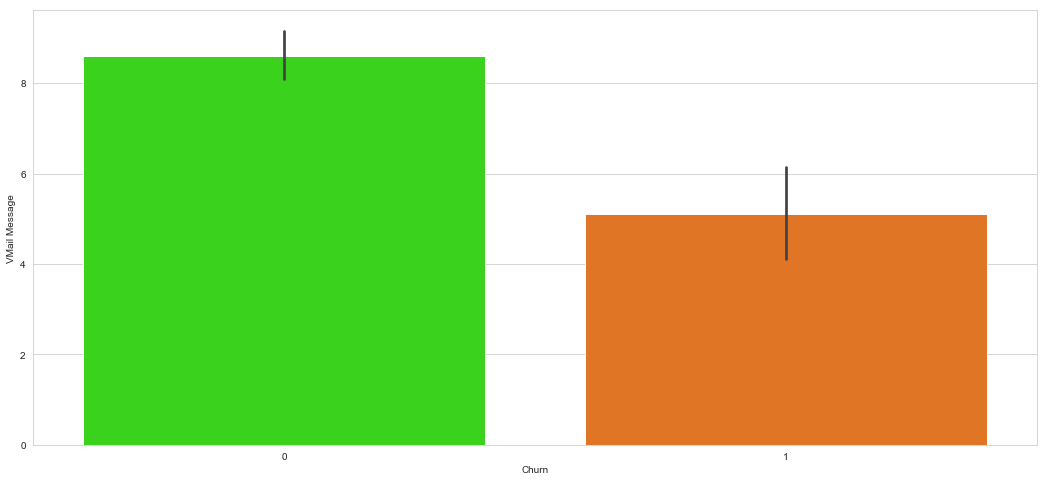

In [11]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Churn',y='VMail Message',data=df,  palette='gist_ncar')

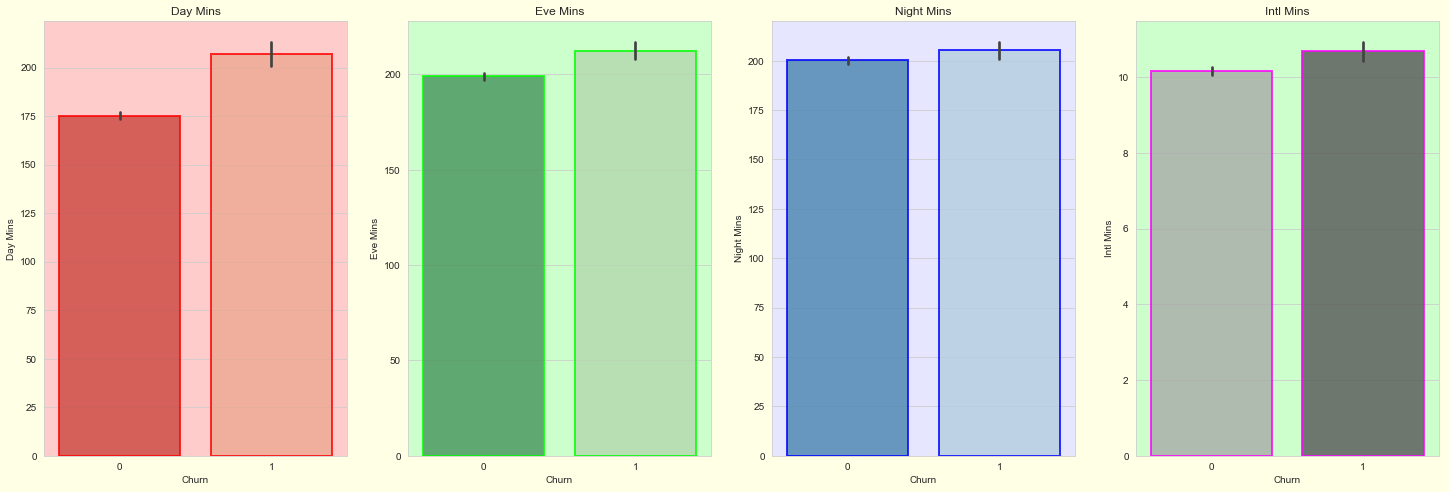

In [12]:
plt.rcParams['figure.facecolor'] = "#ffffe6"

plt.rcParams['axes.facecolor'] = "#ffcccc"
plt.figure(figsize=(25,8))
plt.subplot(1, 4, 1)
plt.title('Day Mins')
sns.barplot(x='Churn',y='Day Mins',data=df, palette='Reds_r',edgecolor='#ff0000',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 2)
plt.title('Eve Mins')
sns.barplot(x='Churn',y='Eve Mins',data=df, palette='Greens_r',edgecolor='#00ff00',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#e6e6ff"
plt.subplot(1, 4, 3)
plt.title('Night Mins')
sns.barplot(x='Churn',y='Night Mins',data=df, palette='Blues_r',edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 4)
plt.title('Intl Mins')
sns.barplot(x='Churn',y='Intl Mins',data=df, palette='gist_yarg',edgecolor='#ff00ff',**{'alpha':0.8,'linewidth':2})


plt.show()

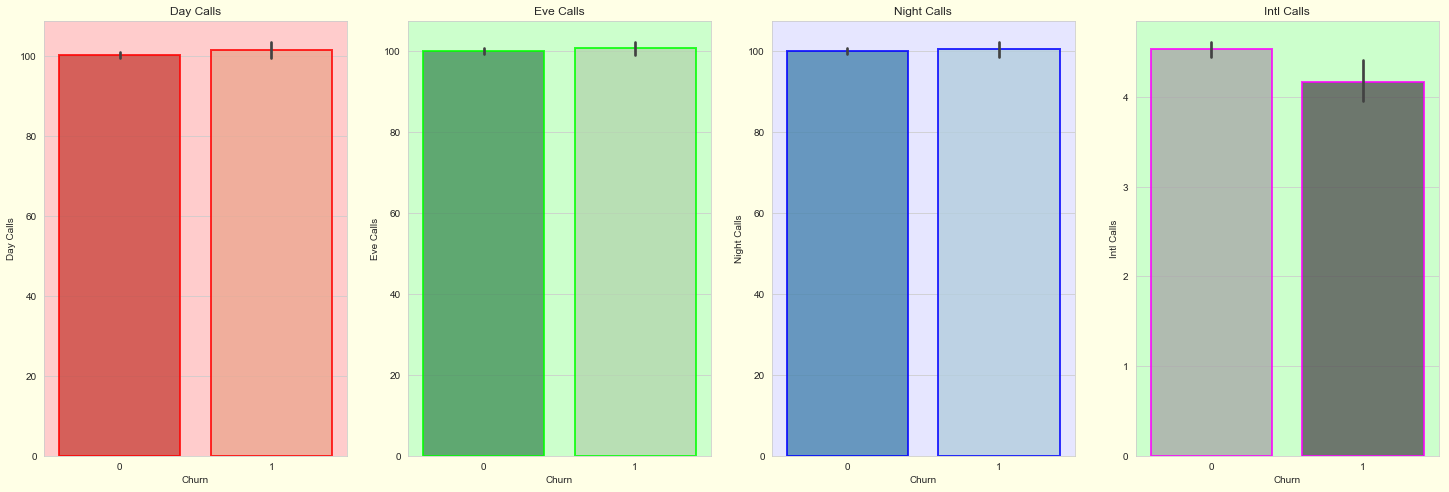

In [13]:
plt.rcParams['figure.facecolor'] = "#ffffe6"

plt.rcParams['axes.facecolor'] = "#ffcccc"
plt.figure(figsize=(25,8))
plt.subplot(1, 4, 1)
plt.title('Day Calls')
sns.barplot(x='Churn',y='Day Calls',data=df, palette='Reds_r',edgecolor='#ff0000',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 2)
plt.title('Eve Calls')
sns.barplot(x='Churn',y='Eve Calls',data=df, palette='Greens_r',edgecolor='#00ff00',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#e6e6ff"
plt.subplot(1, 4, 3)
plt.title('Night Calls')
sns.barplot(x='Churn',y='Night Calls',data=df, palette='Blues_r',edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 4)
plt.title('Intl Calls')
sns.barplot(x='Churn',y='Intl Calls',data=df, palette='gist_yarg',edgecolor='#ff00ff',**{'alpha':0.8,'linewidth':2})


plt.show()

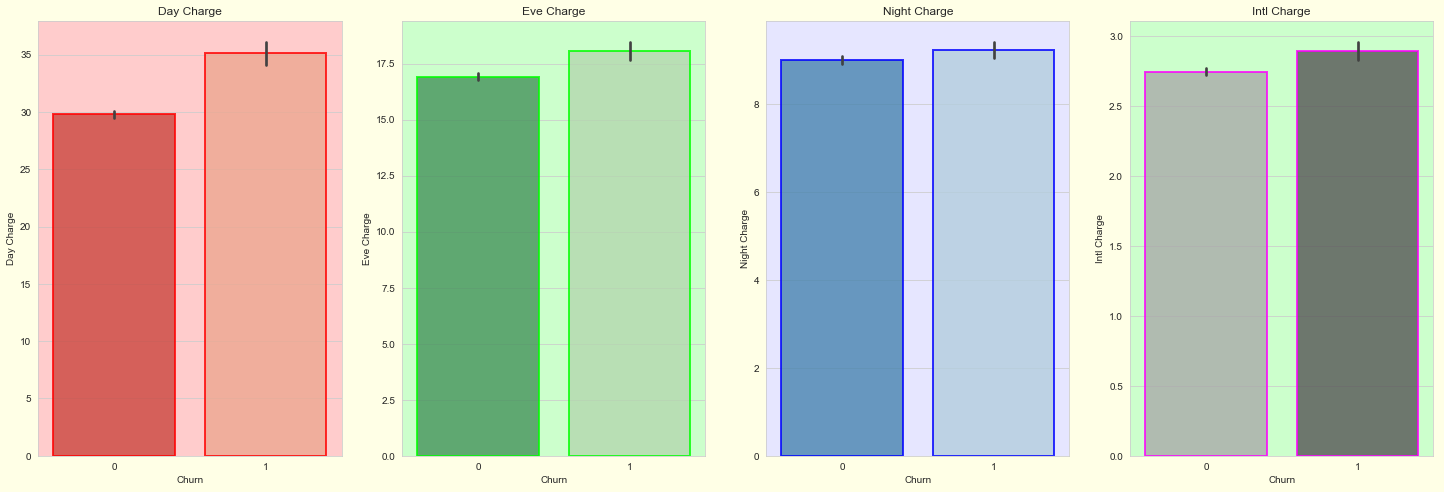

In [14]:
plt.rcParams['figure.facecolor'] = "#ffffe6"

plt.rcParams['axes.facecolor'] = "#ffcccc"
plt.figure(figsize=(25,8))
plt.subplot(1, 4, 1)
plt.title('Day Charge')
sns.barplot(x='Churn',y='Day Charge',data=df, palette='Reds_r',edgecolor='#ff0000',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 2)
plt.title('Eve Charge')
sns.barplot(x='Churn',y='Eve Charge',data=df, palette='Greens_r',edgecolor='#00ff00',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#e6e6ff"
plt.subplot(1, 4, 3)
plt.title('Night Charge')
sns.barplot(x='Churn',y='Night Charge',data=df, palette='Blues_r',edgecolor='#0000ff',**{'alpha':0.8,'linewidth':2})

plt.rcParams['axes.facecolor'] = "#ccffcc"
plt.subplot(1, 4, 4)
plt.title('Intl Charge')
sns.barplot(x='Churn',y='Intl Charge',data=df, palette='gist_yarg',edgecolor='#ff00ff',**{'alpha':0.8,'linewidth':2})


plt.show()

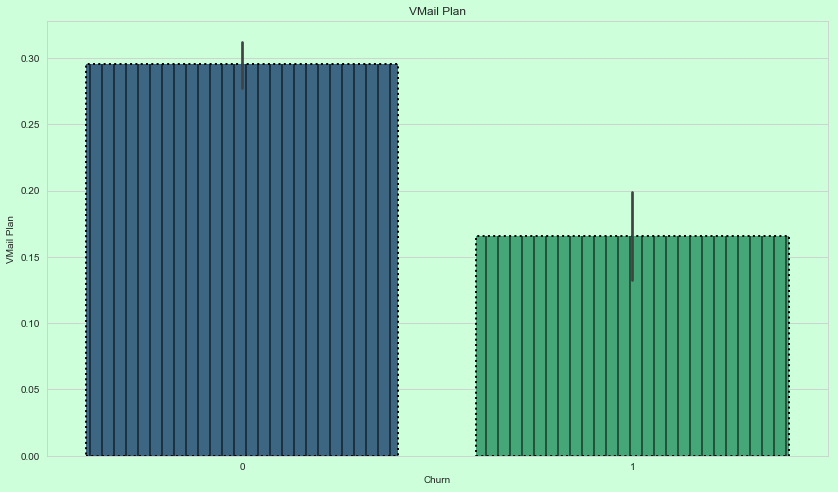

In [15]:
plt.rcParams['axes.facecolor'] = "#ccffda"
plt.rcParams['figure.facecolor'] = "#ccffda"

plt.figure(figsize=(14,8))

sns.barplot(x='Churn',y='VMail Plan',data=df, palette='viridis',edgecolor='black',**{'hatch':"|",'linewidth':2,'linestyle':':'})
plt.title('VMail Plan')
plt.show()

C:\Users\ericksen\Anaconda2anacon\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ericksen\Anaconda2anacon\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


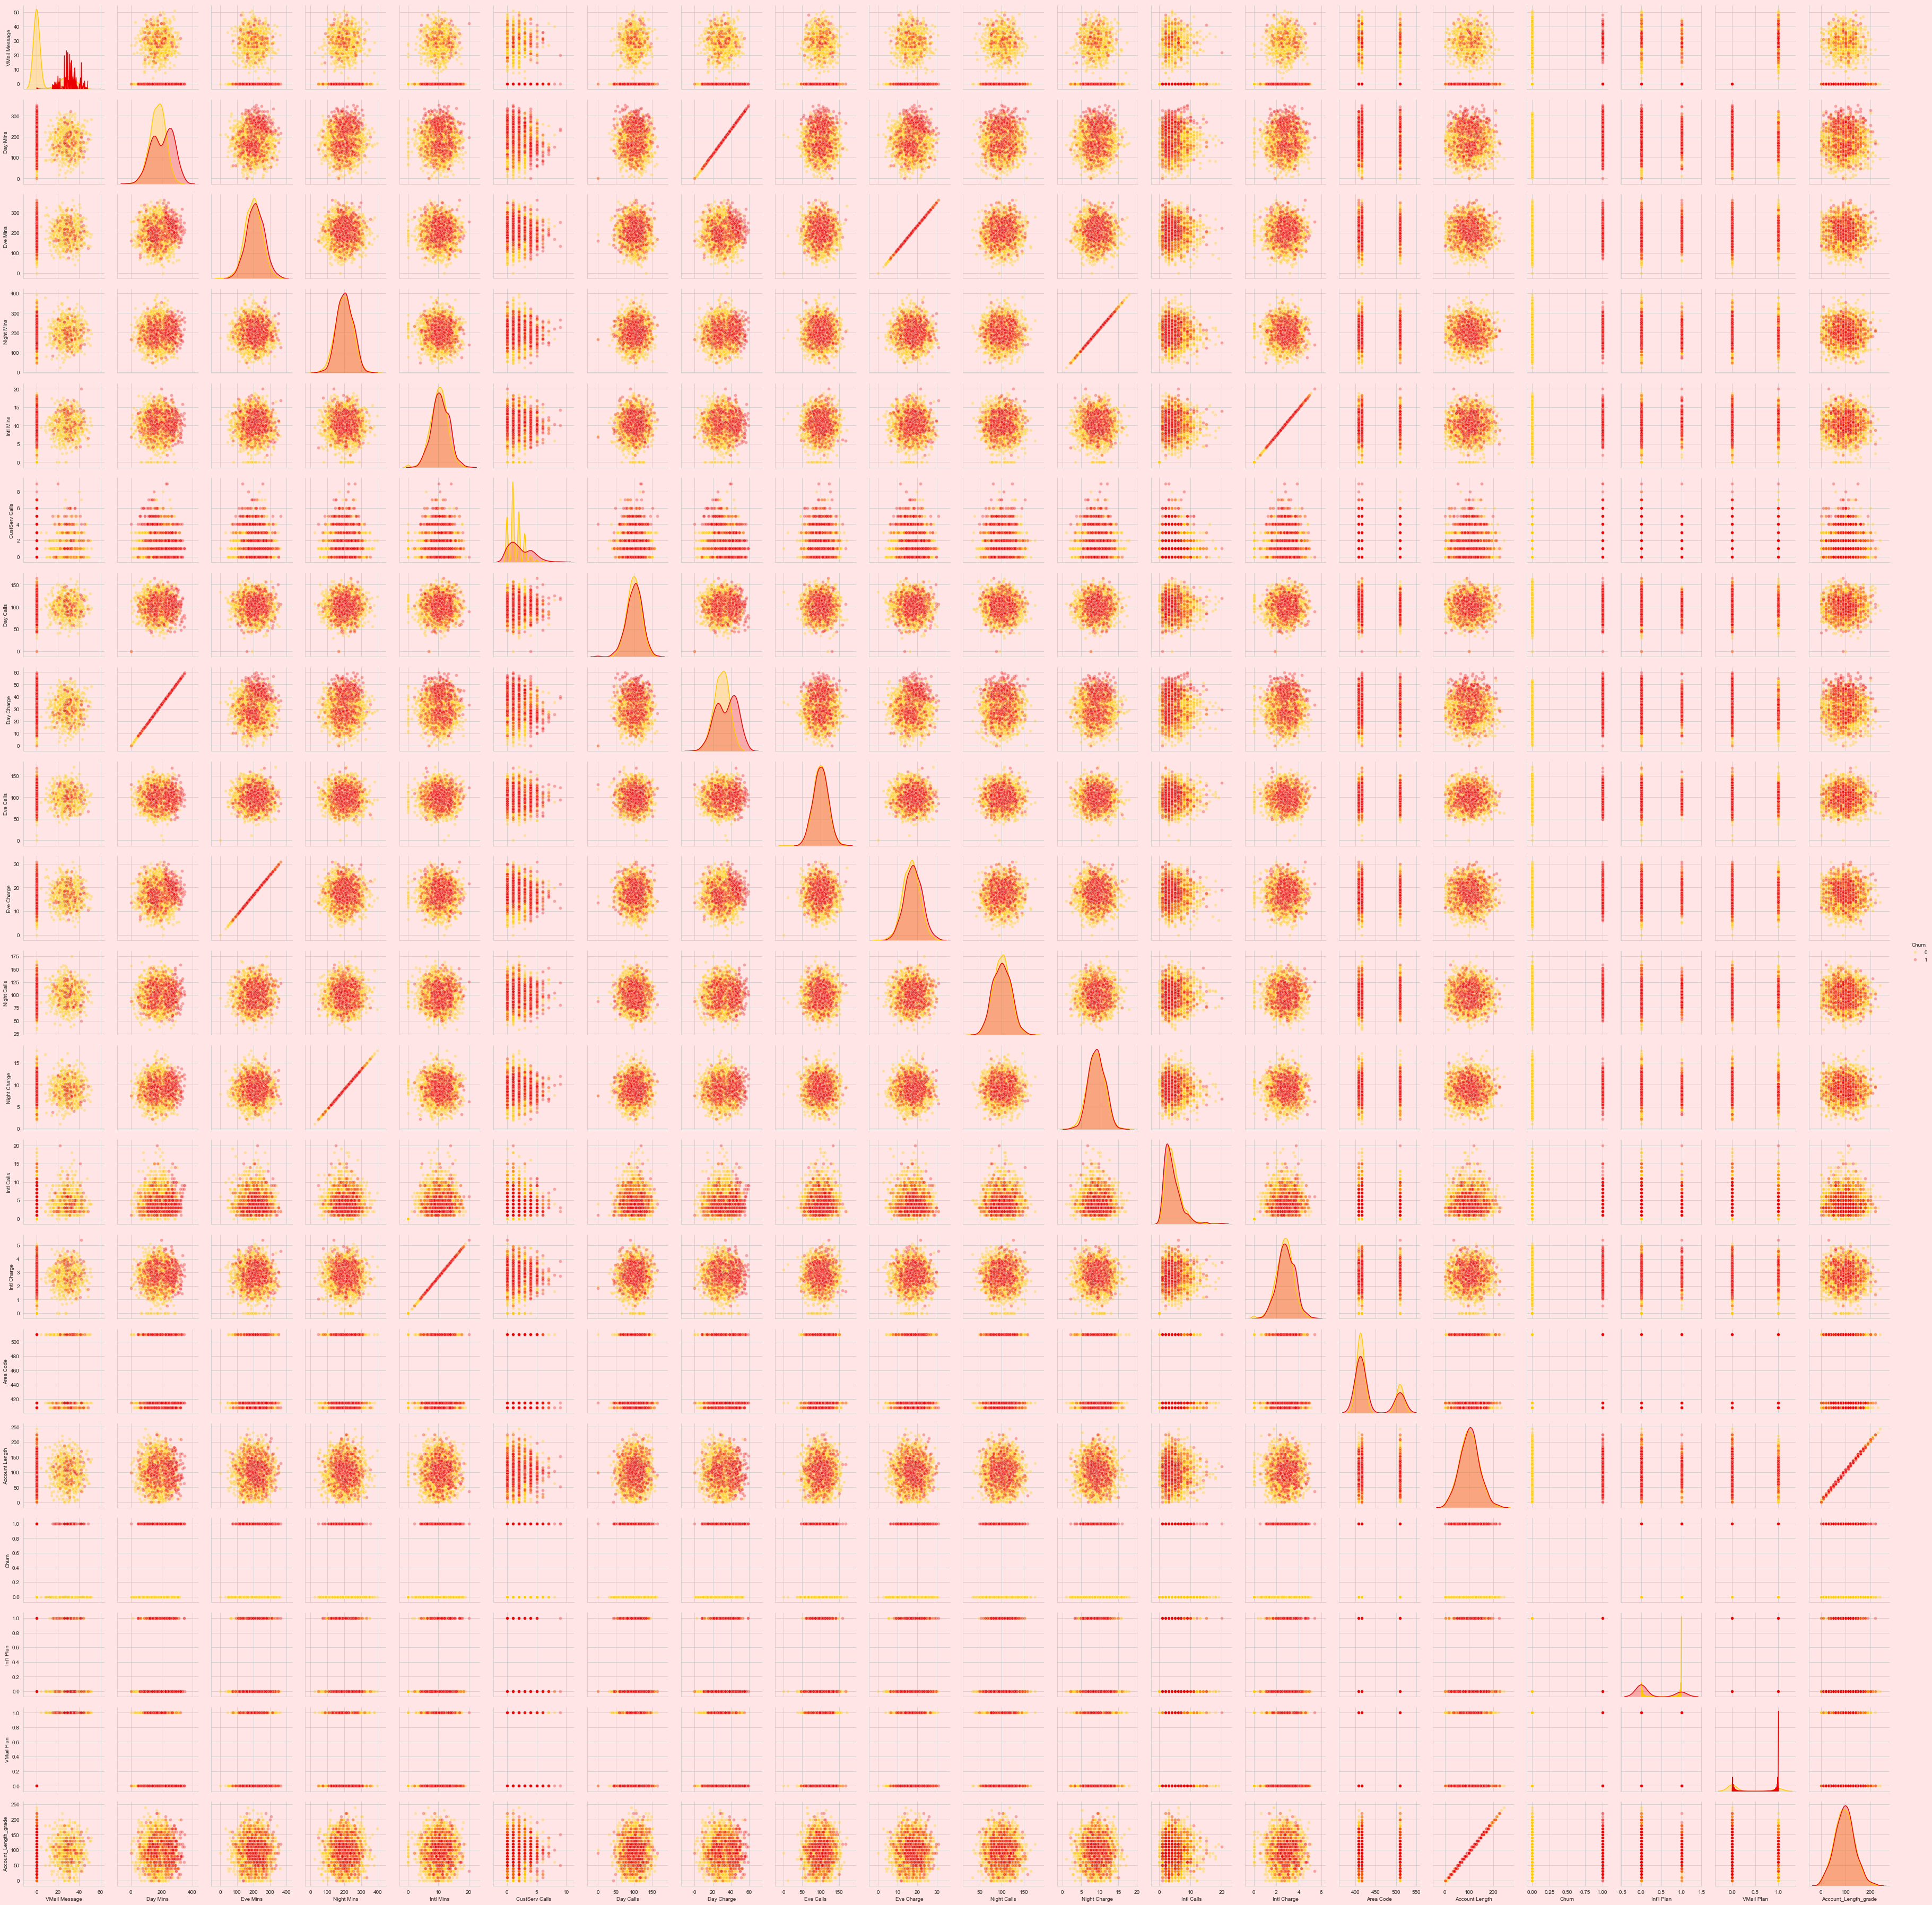

In [16]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
sns.pairplot(data=df,hue='Churn',plot_kws={'alpha':0.3},palette='hot_r')

In [17]:
!pip install dabl
import dabl

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
ERROR: Could not find a version that satisfies the requirement dabl (from versions: none)
ERROR: No matching distribution found for dabl


ImportError: No module named dabl

In [ ]:
import plotly.express as px


In [ ]:

plt.rcParams['figure.figsize'] = (28, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'Churn')